# Sentiment Analysis of Emotions

## Introduction

The aim of this project is to classify emotions from text data using four machine learning models: **Naive Bayes**, **Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**. Sentiment analysis, in the context of emotion classification, involves categorizing text based on the emotional tone it conveys. This has wide applications in customer service, social media monitoring, and emotional intelligence systems.

#### Models Overview

* **Naive Bayes**: A probabilistic classifier based on Bayes' Theorem, Naive Bayes assumes that the features (words) in the data are independent given the class (emotion). It is efficient and performs well with high-dimensional data like text, making it an excellent choice for text classification tasks, especially when the data is noisy.

* **Logistic Regression**: This is a linear model for binary and multi-class classification problems. Logistic regression models the probability that a given input belongs to a particular class. It is a well-known and simple algorithm often used in text classification problems, particularly when the relationships between features and the target variable are assumed to be linear.

* **Random Forest**: An ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction. It works well for complex datasets and is less prone to overfitting compared to a single decision tree. Random Forest is known for handling a large number of features, making it suitable for text data with many dimensions.

* **Support Vector Machine (SVM)**: A powerful classifier that works by finding the optimal hyperplane that separates the classes in high-dimensional space. SVM can efficiently handle both linear and non-linear data through kernel tricks, making it ideal for text data where class separation is complex.

#### Evaluation Metrics
In this project, we evaluate and compare the performance of the models using the following metrics:
* **Accuracy**: The percentage of correctly classified instances out of all instances.

* **Precision**: The ratio of correctly predicted positive instances to the total predicted positive instances, which indicates how reliable the model’s positive predictions are.

* **Recall (Sensitivity)**: The ratio of correctly predicted positive instances to all actual positive instances, indicating how well the model identifies positive instances.

* **F1 Score**: The harmonic mean of precision and recall, providing a single metric to evaluate the balance between them.

* **Confusion Matrix**: A matrix that shows the true vs. predicted classifications for each emotion label, offering insight into model performance for each class.

We will evaluate these models on emotion-labeled datasets and compare their performance based on these metrics to identify the best-performing model for emotion classification.

### 1. Importing Libraries and Loading Data

#### 1.1 Importing Libraries

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# Libraries for NLP and model building
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from collections import Counter

#### 1.2 Importing Dataset

In [4]:
# df = pd.read_csv('./dataset/train.csv')

In [5]:
# Load the test.txt dataset
df = pd.read_csv('./dataset/train.txt', names=['Text', 'Emotion'], sep=';')

In [6]:
# Display the first few rows of the dataset
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
# Print the shape of the dataset (number of rows and columns)
print(df.shape)

(16000, 2)


### 2. Data Preprocessing

#### 2.1 Cleaning the Data

Remove the HTML tags, URL patters, unwanted patters, special characters and numbers, and removal of stopwords

In [13]:
# Function to clean the text
def clean_text(text):
    # # Remove HTML tags using BeautifulSoup (in case some tags are still in text form)
    # text = BeautifulSoup(text, "html.parser").get_text()

    # # Remove any URL patterns (http, https, ftp, etc.)
    # text = re.sub(r'http[s]?://\S+', '', text)
    
    # Remove any other unwanted patterns like href, src, etc.
    text = re.sub(r'\b(?:href|src|alt|title|class|id|style|rel|data|http|https|src|www|img)\b', '', text)

    # Remove special characters and numbers (keeping only alphabets and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords (optional, can be added if you have a stopwords list)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# Apply the cleaning function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)
# Save the cleaned DataFrame to a CSV file
df.to_csv('./dataset/cleaned_data.csv', index=False)

In [14]:
# Display cleaned text
df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy


#### 2.2 Emotion Distribution using Pie Chart

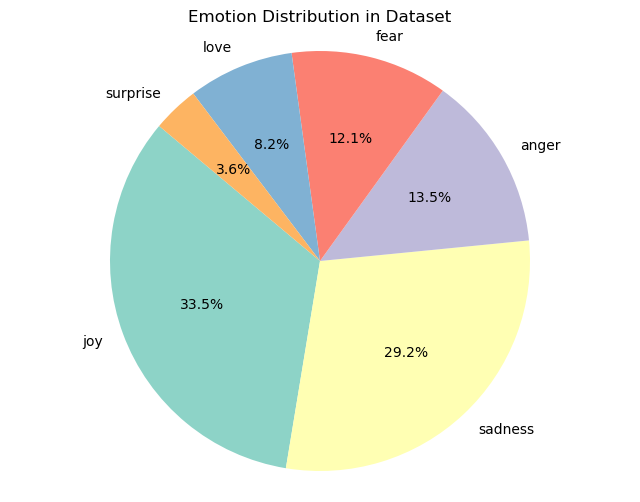

In [20]:
# Display a pie chart of emotion counts
emotion_counts = df['Emotion'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(emotion_counts)))
plt.title('Emotion Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

#### 2.3 Emotion Counts using Bar Chart

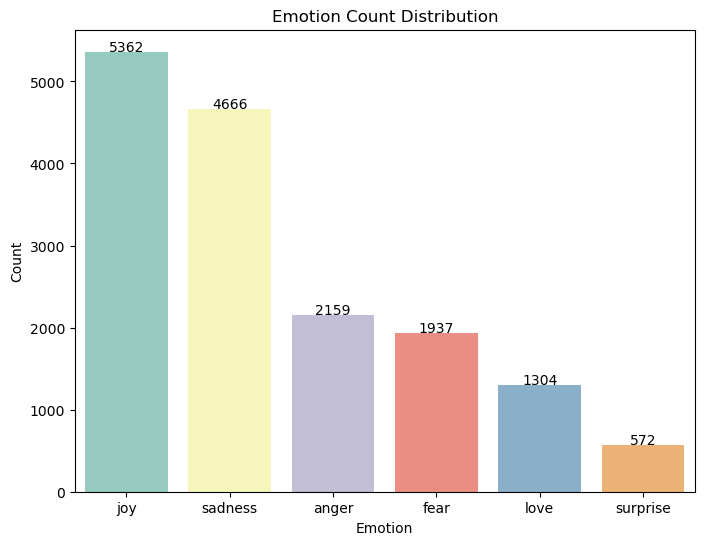

In [15]:
# Display emotion counts
emotion_counts = df['Emotion'].value_counts()

# Convert the emotion counts to a DataFrame for use in seaborn
emotion_counts_df = emotion_counts.reset_index()
emotion_counts_df.columns = ['Emotion', 'Count']

# Bar chart with exact count annotations
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Emotion', y='Count', data=emotion_counts_df, palette="Set3", hue='Emotion')

# Annotating the exact counts on each bar
for index, row in emotion_counts_df.iterrows():
    barplot.text(index, row['Count'], round(row['Count'], 2), color='black', ha="center")

plt.title('Emotion Count Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


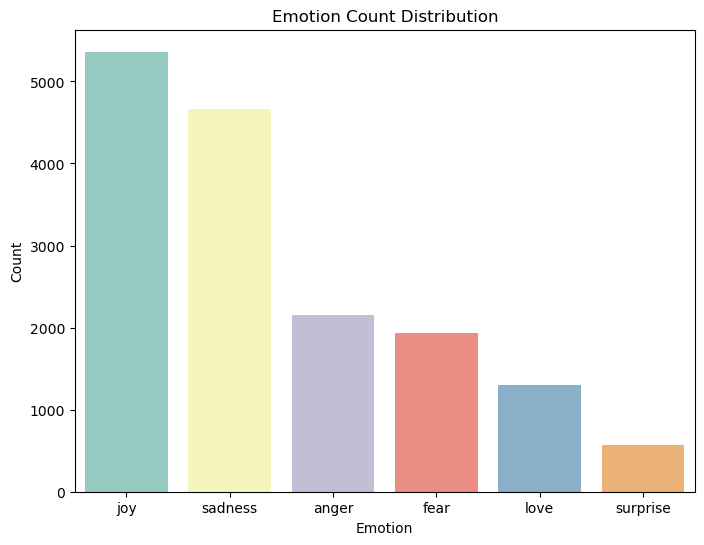

In [22]:
# Display emotion counts
emotion_counts = df['Emotion'].value_counts()

# Convert the emotion counts to a DataFrame for use in seaborn
emotion_counts_df = emotion_counts.reset_index()
emotion_counts_df.columns = ['Emotion', 'Count']

# Bar chart with hue assigned
plt.figure(figsize=(8, 6))
sns.barplot(x='Emotion', y='Count', data=emotion_counts_df, palette="Set3", hue='Emotion')
plt.title('Emotion Count Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### 2.4 Word Cloud

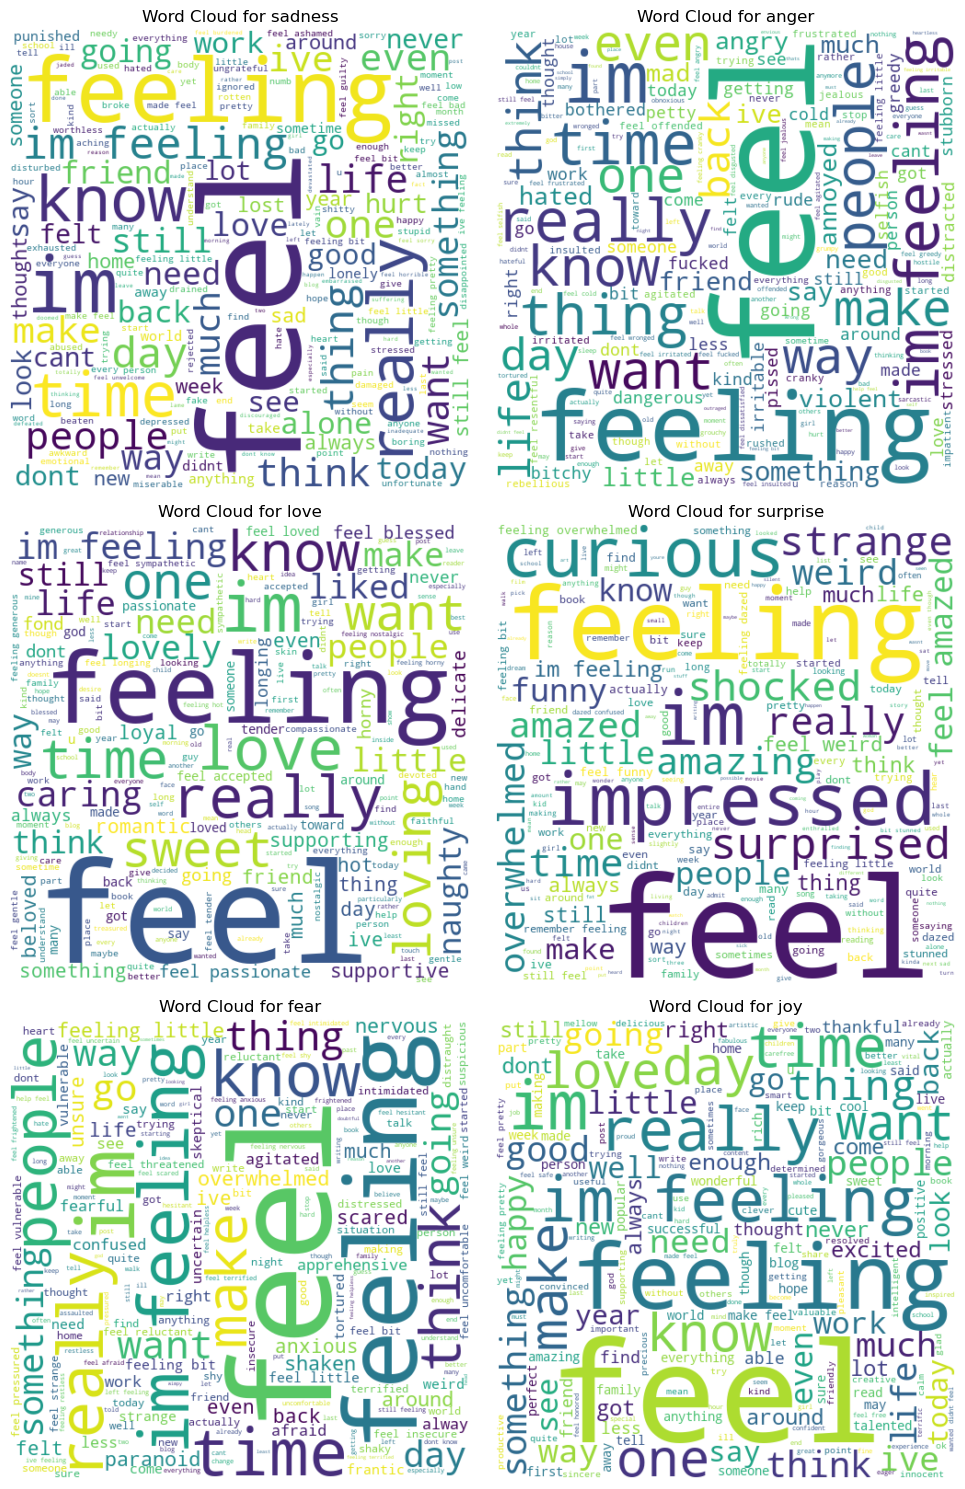

In [24]:
# Generate word clouds for each emotion category
unique_emotions = df['Emotion'].unique()

# Dynamically calculate the number of rows and columns for the subplots
num_emotions = len(unique_emotions)
cols = 2  # Fixed number of columns (you can adjust this)
rows = np.ceil(num_emotions / cols).astype(int)  # Calculate the required rows

# Create a plot for each emotion category
plt.figure(figsize=(10, 5 * rows))
for i, emotion in enumerate(unique_emotions, 1):
    # Filter the DataFrame for the current emotion
    emotion_text = df[df['Emotion'] == emotion]['Cleaned_Text'].str.cat(sep=' ')

    # Generate the word cloud
    wordcloud = WordCloud(width=500, height=500, background_color='white', max_words=200).generate(emotion_text)

    # Display the word cloud
    plt.subplot(rows, cols, i)  # Dynamically adjust subplots based on the number of categories
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion}')

plt.tight_layout()
plt.show()

#### 2.5 Label Encoding

In [26]:
# Convert categorical emotions to numerical values
label_encoder = LabelEncoder()
df['Emotion_Label'] = label_encoder.fit_transform(df['Emotion'])

# Display the mapping of labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [27]:
df[['Cleaned_Text', 'Emotion', 'Emotion_Label']].head()

,Cleaned_Text,Emotion,Emotion_Label
0,didnt feel humiliated,sadness,4
1,go feeling hopeless damned hopeful around some...,sadness,4
2,im grabbing minute post feel greedy wrong,anger,0
3,ever feeling nostalgic fireplace know still pr...,love,3
4,feeling grouchy,anger,0


### 3. Splitting the Data

#### 3.1 Perform stratified sampling 
Stratified sampling ensures that the distribution of emotion labels in the dataset is preserved across training and test sets. This is critical since some emotions, like "surprise," may be underrepresented.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'],
    df['Emotion_Label'],
    test_size = 0.2,
    random_state = 42,
    stratify = df['Emotion_Label'],
)

In [31]:
# Check class distribution after splitting
print("Training class distribution:", y_train.value_counts())
print("Testing class distribution:", y_test.value_counts())

Training class distribution: Emotion_Label
2    4290
4    3733
0    1727
1    1550
3    1043
5     457
Name: count, dtype: int64
Testing class distribution: Emotion_Label
2    1072
4     933
0     432
1     387
3     261
5     115
Name: count, dtype: int64


In [32]:
# Verify the distribution
print("Training set distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

Training set distribution:
Emotion_Label
2    0.335156
4    0.291641
0    0.134922
1    0.121094
3    0.081484
5    0.035703
Name: proportion, dtype: float64

Test set distribution:
Emotion_Label
2    0.335000
4    0.291563
0    0.135000
1    0.120938
3    0.081562
5    0.035937
Name: proportion, dtype: float64


#### 3.2 Up/down sampling for trainset

##### Undersampling Majority Classes

In [35]:
# Convert the training data into a DataFrame for easier manipulation
train_df = pd.DataFrame({'Text': X_train, 'Emotion_Label': y_train})

# Calculate class counts
class_counts = train_df['Emotion_Label'].value_counts()

# Define the new adjustments (increases for anger, fear, love, and especially surprise)
adjustments = {
    0: -0.45,  # Anger
    1: -0.35,  # Fear
    2: -0.75,  # Joy
    3: 0,  # Love
    4: -0.73,  # Sadness
    5: 1.30   # Surprise
}

# Create an empty DataFrame to store the adjusted data
adjusted_train_df = pd.DataFrame()

# Perform adjustments for each class
for label, adjustment in adjustments.items():
    subset = train_df[train_df['Emotion_Label'] == label]
    n_samples = int(len(subset) * (1 + adjustment))
    
    if adjustment > 0:  # Oversampling
        # Randomly sample with replacement
        resampled_subset = subset.sample(n=n_samples, replace=True, random_state=42)
    else:  # Undersampling
        # Randomly sample without replacement
        resampled_subset = subset.sample(n=n_samples, replace=False, random_state=42)
    
    adjusted_train_df = pd.concat([adjusted_train_df, resampled_subset], ignore_index=True)

# Add the untouched classes back
untouched_classes = set(class_counts.keys()) - set(adjustments.keys())
untouched_df = train_df[train_df['Emotion_Label'].isin(untouched_classes)]
adjusted_train_df = pd.concat([adjusted_train_df, untouched_df], ignore_index=True)

# Shuffle the adjusted training set
adjusted_train_df = adjusted_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Get the new class distribution
new_class_counts = Counter(adjusted_train_df['Emotion_Label'])
print("New class distribution:", new_class_counts)

# Update X_train and y_train
X_train = adjusted_train_df['Text']
y_train = adjusted_train_df['Emotion_Label']


New class distribution: Counter({2: 1072, 5: 1051, 3: 1043, 1: 1007, 4: 1007, 0: 949})


In [36]:
print(adjusted_train_df)

                                                   Text  Emotion_Label
0                      even feel surprised dark outside              5
1     im also feelin lil uptight sucky lately know r...              1
2              cant help feeling curious know ive heard              5
3                                    feeling melancholy              4
4                                 could feel didnt hurt              4
...                                                 ...            ...
6124                  wake realize panty wet feel horny              3
6125       im getting really feel dazed confused moment              5
6126  feel weird companies approve disapprove dot co...              5
6127         feel bit overwhelmed areas may come whiney              5
6128  sat dave atell first trying feel rude guys eating              0

[6129 rows x 2 columns]


In [37]:
# Convert X_train back to a Series if it has only one feature/column
if isinstance(X_train, pd.DataFrame):
    if X_train.shape[1] == 1:
        X_train = X_train.iloc[:, 0]
elif isinstance(X_train, pd.Series):
    pass
else:
    raise ValueError("Unexpected type for X_train. Check the structure.")

print(X_train)

0                        even feel surprised dark outside
1       im also feelin lil uptight sucky lately know r...
2                cant help feeling curious know ive heard
3                                      feeling melancholy
4                                   could feel didnt hurt
                              ...                        
6124                    wake realize panty wet feel horny
6125         im getting really feel dazed confused moment
6126    feel weird companies approve disapprove dot co...
6127           feel bit overwhelmed areas may come whiney
6128    sat dave atell first trying feel rude guys eating
Name: Text, Length: 6129, dtype: object


In [38]:
# Convert y_train back to a Series if it has only one feature/column
if isinstance(y_train, pd.DataFrame):
    if y_train.shape[1] == 1:
        y_train = y_train.iloc[:, 0]
elif isinstance(y_train, pd.Series):
    pass
else:
    raise ValueError("Unexpected type for y_train. Check the structure.")

print(y_train.head())
print(type(y_train))

0    5
1    1
2    5
3    4
4    4
Name: Emotion_Label, dtype: int32
<class 'pandas.core.series.Series'>


In [39]:
print(X_train.head())

0                     even feel surprised dark outside
1    im also feelin lil uptight sucky lately know r...
2             cant help feeling curious know ive heard
3                                   feeling melancholy
4                                could feel didnt hurt
Name: Text, dtype: object


#### 3.1 TF-IDF Vectorization

In [41]:
tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 3))

X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [42]:
# Display the shape of the transformed features
print("Shape of X_train:", X_train_tfidf.shape)
print("Shape of X_test:", X_test_tfidf.shape)

Shape of X_train: (6129, 83267)
Shape of X_test: (3200, 83267)


In [43]:
# view the feature names (unigrams + bigrams + trigrams)
print("Feature names (unigrams, bigrams and trigrams):", tfidfvectorizer.get_feature_names_out())

Feature names (unigrams, bigrams and trigrams): ['aac' 'aac feeling' 'aac feeling kind' ... 'zumba followed half'
 'zumba lame' 'zumba lame housewife']


### 4. Machine Learning Algorithms and Training the Model

In [45]:
# # Define emotion labels mapping
# emotion_labels = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

# # Define classifiers, adding MLPClassifier for ANN
# classifier = {
#     'Naive Bayes': MultinomialNB(),
#     'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
#     'Random Forest': RandomForestClassifier(),
#     'SVM': SVC(),
#     'ANN (MLP)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # ANN Model
# }

# # Initialize a dictionary to store results for plotting
# accuracy_results = {}

# # Set up the plot for accuracy bar chart
# plt.figure(figsize=(8, 6))

# for name, clf in classifier.items():
#     # Fit the classifier
#     clf.fit(X_train_tfidf, y_train)
    
#     # Predict using the model
#     y_pred_tfidf = clf.predict(X_test_tfidf)
    
#     # Calculate accuracy
#     accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
#     accuracy_results[name] = accuracy_tfidf  # Store the accuracy
    
#     # Print classification report
#     print(f"\n============{name}============")
#     print(f"Accuracy: {accuracy_tfidf}")
#     print("Classification Report")
#     print(classification_report(y_test, y_pred_tfidf, target_names=[emotion_labels[i] for i in range(6)], zero_division=0))

### Hyperparameter Tuning

In [46]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score

# # Define emotion labels mapping
# emotion_labels = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

# # Define classifiers with their respective parameter grids
# param_grids = {
#     'Naive Bayes': {
#         'alpha': [0.1, 0.5, 1.0]  # Example for MultinomialNB
#     },
#     'Logistic Regression': {
#         'solver': ['liblinear', 'lbfgs'],
#         'C': [0.1, 1, 10],  # Regularization strength
#         'max_iter': [100, 200]
#     },
#     'Random Forest': {
#         'n_estimators': [100, 200],
#         'max_depth': [10, 20, None],
#         'min_samples_split': [2, 5],
#         'min_samples_leaf': [1, 2]
#     },
#     'SVM': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto']
#     },
#     'ANN': {
#         'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#         'activation': ['tanh', 'relu'],
#         'solver': ['adam', 'sgd'],
#         'alpha': [0.0001, 0.001],
#         'learning_rate': ['constant', 'adaptive'],
#         'max_iter': [200, 500]
#     }
# }

# # Initialize classifiers
# classifiers = {
#     'Naive Bayes': MultinomialNB(),
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'SVM': SVC(),
#     'ANN': MLPClassifier()
# }

# # Initialize a dictionary to store results for each model
# best_estimators = {}
# accuracy_results = {}

# # Perform GridSearchCV for each model
# for name, clf in classifiers.items():
#     print(f"\nPerforming Grid Search for {name}...")
#     param_grid = param_grids[name]
#     grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    
#     # Fit the model to the training data
#     grid_search.fit(X_train_tfidf, y_train)
    
#     # Get the best estimator and best parameters
#     best_estimators[name] = grid_search.best_estimator_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")
    
#     # Predict using the best model
#     y_pred = best_estimators[name].predict(X_test_tfidf)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_results[name] = accuracy
#     print(f"Accuracy for {name}: {accuracy}")
    
#     # Print classification report
#     print(f"Classification report for {name}:")
#     print(classification_report(y_test, y_pred, target_names=[emotion_labels[i] for i in range(6)], zero_division=0))

# # Print out final accuracies for all models
# print("\nFinal accuracies for all models:")
# for model, accuracy in accuracy_results.items():
#     print(f"{model}: {accuracy}")


In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Define emotion labels mapping
emotion_labels = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

# Fixed optimal parameters for models
param_grids = {
    'Naive Bayes': {
        'alpha': 0.5
    },
    'Logistic Regression': {
        'solver': 'liblinear',
        'C': 10,
        'max_iter': 100
    },
    'Random Forest': {
        'n_estimators': 100,
        'max_depth': None,
        'min_samples_split': 5,
        'min_samples_leaf': 2
    },
    'SVM': {
        'C': 10,
        'kernel': 'linear',
        'gamma': 'scale'
    },
    'ANN': {
        'hidden_layer_sizes': (100,),
        'activation': 'tanh',
        'solver': 'adam',
        'alpha': 0.0001,
        'learning_rate': 'constant',
        'max_iter': 1000
    },
    'XGBoost': {
        'n_estimators': 100,
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0,
        'reg_alpha': 0,
        'reg_lambda': 1
    }
}

# Initialize classifiers with fixed parameters
classifiers = {
    'Naive Bayes': MultinomialNB(alpha=param_grids['Naive Bayes']['alpha']),
    'Logistic Regression': LogisticRegression(solver=param_grids['Logistic Regression']['solver'],
                                              C=param_grids['Logistic Regression']['C'],
                                              max_iter=param_grids['Logistic Regression']['max_iter']),
    'Random Forest': RandomForestClassifier(n_estimators=param_grids['Random Forest']['n_estimators'],
                                             max_depth=param_grids['Random Forest']['max_depth'],
                                             min_samples_split=param_grids['Random Forest']['min_samples_split'],
                                             min_samples_leaf=param_grids['Random Forest']['min_samples_leaf']),
    'SVM': SVC(C=param_grids['SVM']['C'], kernel=param_grids['SVM']['kernel'], gamma=param_grids['SVM']['gamma']),
    'ANN': MLPClassifier(hidden_layer_sizes=param_grids['ANN']['hidden_layer_sizes'],
                         activation=param_grids['ANN']['activation'],
                         solver=param_grids['ANN']['solver'],
                         alpha=param_grids['ANN']['alpha'],
                         learning_rate=param_grids['ANN']['learning_rate'],
                         max_iter=param_grids['ANN']['max_iter']),
    'XGBoost': XGBClassifier(n_estimators=param_grids['XGBoost']['n_estimators'],
                              max_depth=param_grids['XGBoost']['max_depth'],
                              learning_rate=param_grids['XGBoost']['learning_rate'],
                              subsample=param_grids['XGBoost']['subsample'],
                              colsample_bytree=param_grids['XGBoost']['colsample_bytree'],
                              gamma=param_grids['XGBoost']['gamma'],
                              reg_alpha=param_grids['XGBoost']['reg_alpha'],
                              reg_lambda=param_grids['XGBoost']['reg_lambda'])
    
}

# Initialize a dictionary to store results for each model
best_estimators = {}
accuracy_results = {}

# Perform GridSearchCV for each model
for name, clf in classifiers.items():
    # Fit the model to the training data
    clf.fit(X_train_tfidf, y_train)
    
    # Predict using the model
    y_pred = clf.predict(X_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy}")
    
    # Print classification report
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred, target_names=[emotion_labels[i] for i in range(6)], zero_division=0))

# Print out final accuracies for all models
print("\nFinal accuracies for all models:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy}")


Accuracy for Naive Bayes: 0.785
Classification report for Naive Bayes:
              precision    recall  f1-score   support

       anger       0.86      0.74      0.79       432
        fear       0.76      0.79      0.78       387
         joy       0.89      0.78      0.83      1072
        love       0.56      0.89      0.69       261
     sadness       0.92      0.77      0.84       933
    surprise       0.34      0.90      0.50       115

    accuracy                           0.79      3200
   macro avg       0.72      0.81      0.74      3200
weighted avg       0.83      0.79      0.80      3200

Accuracy for Logistic Regression: 0.8584375
Classification report for Logistic Regression:
              precision    recall  f1-score   support

       anger       0.85      0.87      0.86       432
        fear       0.83      0.84      0.84       387
         joy       0.92      0.84      0.88      1072
        love       0.63      0.97      0.76       261
     sadness       0.94 

#### 4.2 Accuracy

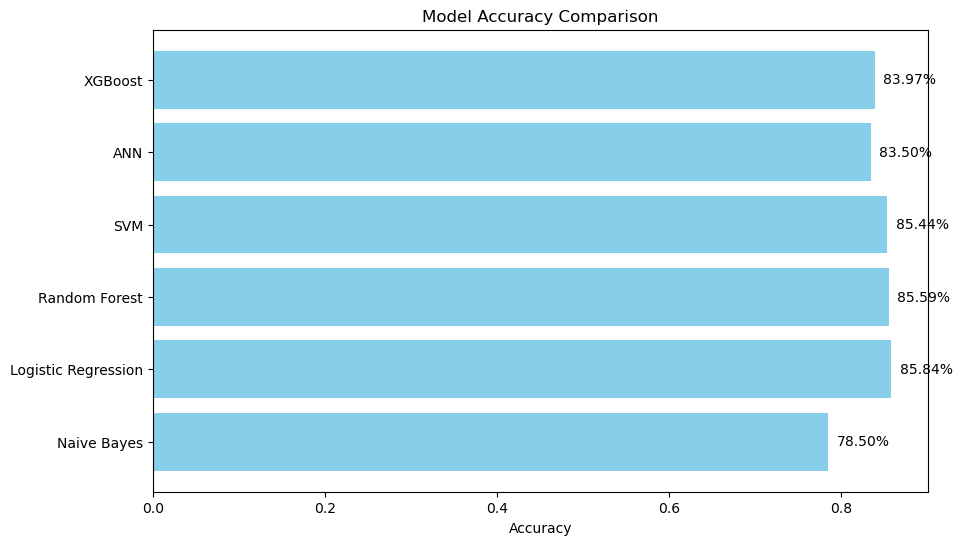

In [81]:
import matplotlib.pyplot as plt

# Create bar plot for accuracies
model_names = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add annotations (exact percentage) on the bars
for bar in bars:
    width = bar.get_width()  # Get the width of the bar (accuracy)
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width * 100:.2f}%', va='center', ha='left')

plt.show()


#### 4.3 Confusion Matrix

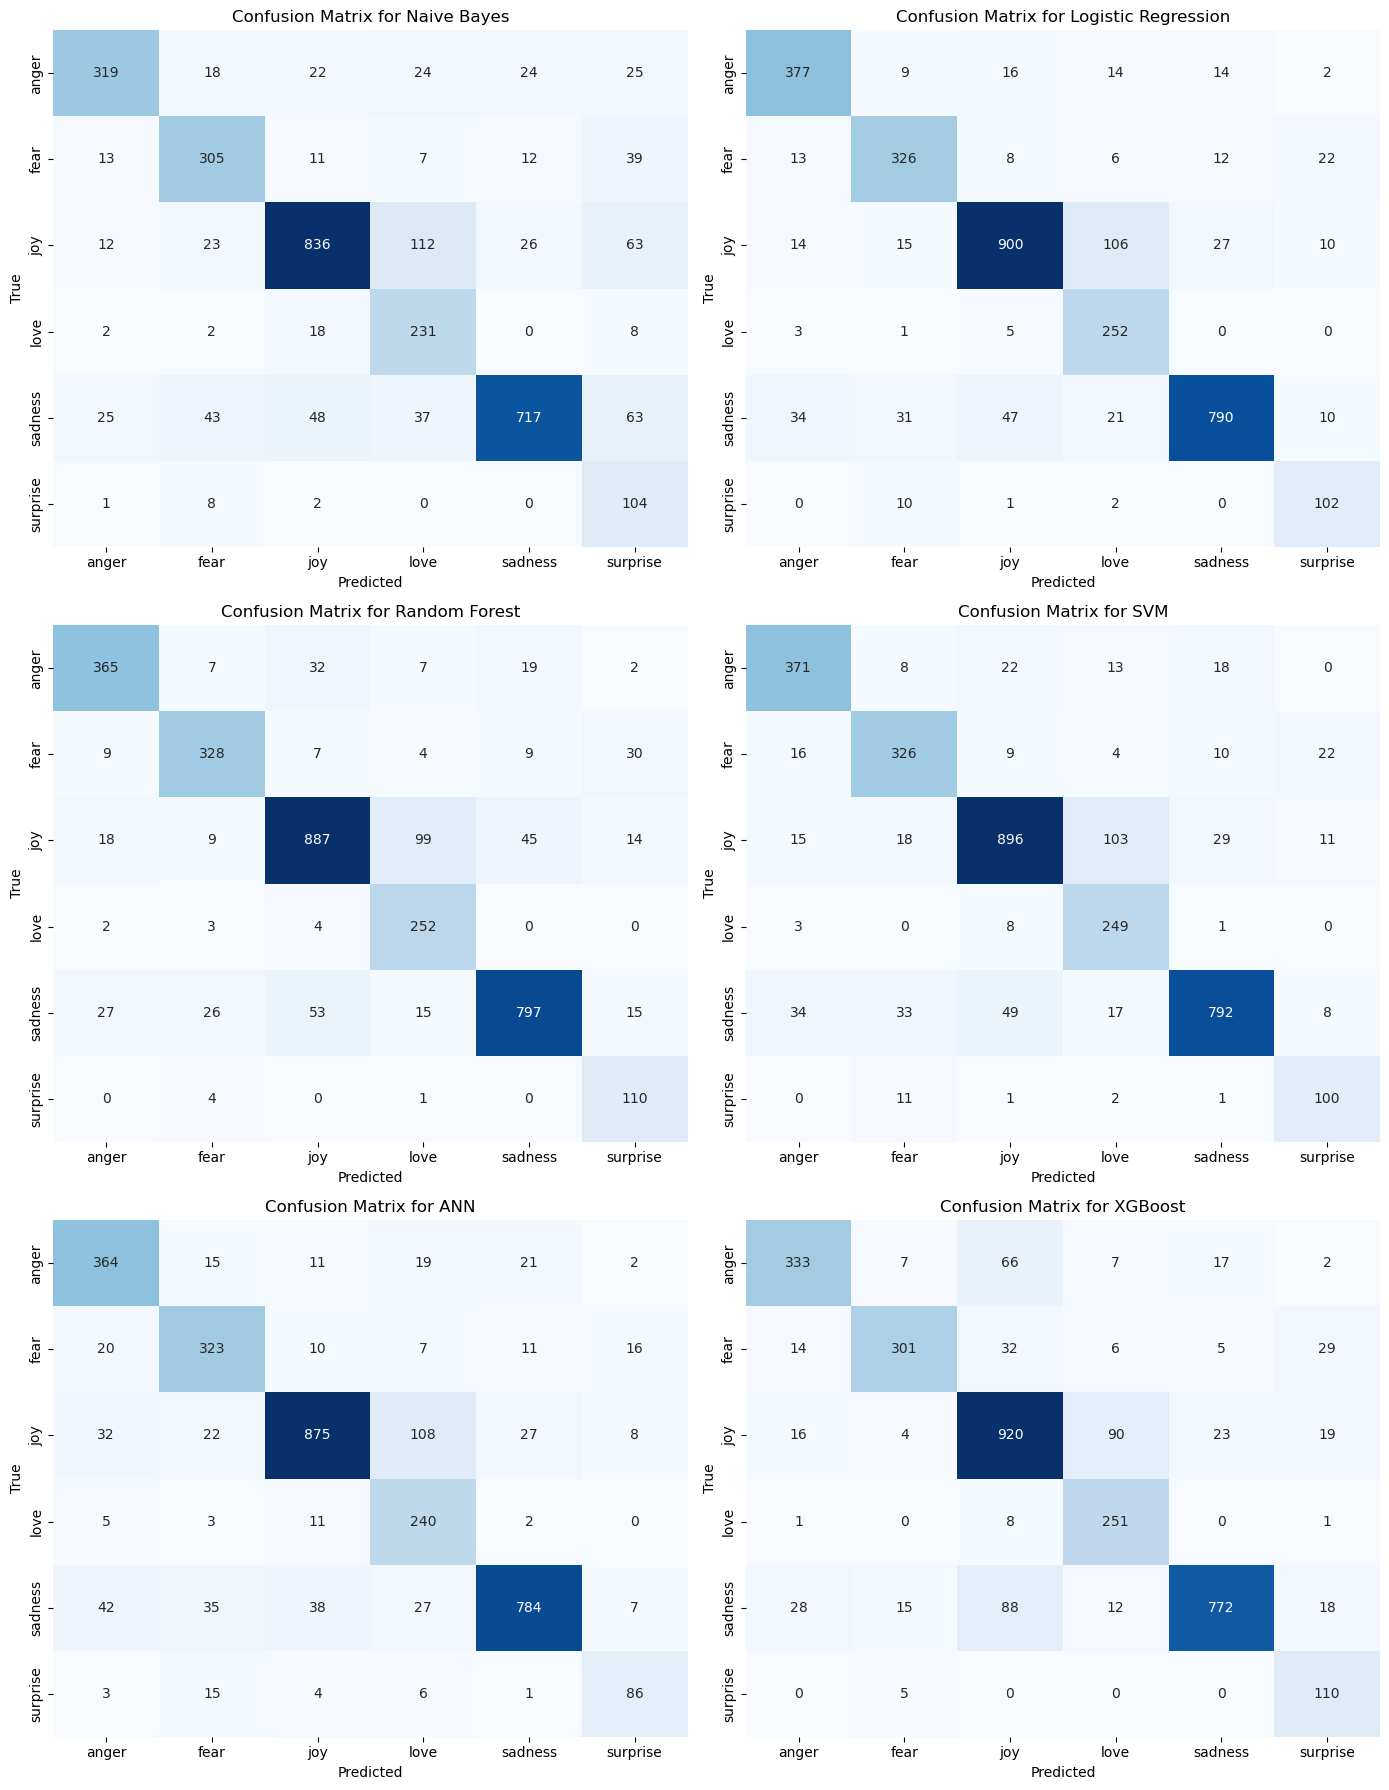

In [62]:
# Set up the plot for confusion matrix heatmaps
fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # 3x2 grid for 5 classifiers

for i, (name, clf) in enumerate(classifiers.items()):
    # Predict using the model
    y_pred_tfidf = clf.predict(X_test_tfidf)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_tfidf)
    
    # Plot confusion matrix as a heatmap
    ax = axes[i//2, i%2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=[emotion_labels[i] for i in range(6)], 
                yticklabels=[emotion_labels[i] for i in range(6)])
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Hide the empty subplot (if any)
if len(classifiers) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout for confusion matrix subplots
plt.tight_layout()
plt.show()


Confusion Matrix for Naive Bayes:
[[319  18  22  24  24  25]
 [ 13 305  11   7  12  39]
 [ 12  23 836 112  26  63]
 [  2   2  18 231   0   8]
 [ 25  43  48  37 717  63]
 [  1   8   2   0   0 104]]


Confusion Matrix for Logistic Regression:
[[377   9  16  14  14   2]
 [ 13 326   8   6  12  22]
 [ 14  15 900 106  27  10]
 [  3   1   5 252   0   0]
 [ 34  31  47  21 790  10]
 [  0  10   1   2   0 102]]


Confusion Matrix for Random Forest:
[[365   7  32   7  19   2]
 [  9 328   7   4   9  30]
 [ 18   9 887  99  45  14]
 [  2   3   4 252   0   0]
 [ 27  26  53  15 797  15]
 [  0   4   0   1   0 110]]


Confusion Matrix for SVM:
[[371   8  22  13  18   0]
 [ 16 326   9   4  10  22]
 [ 15  18 896 103  29  11]
 [  3   0   8 249   1   0]
 [ 34  33  49  17 792   8]
 [  0  11   1   2   1 100]]


Confusion Matrix for ANN:
[[364  15  11  19  21   2]
 [ 20 323  10   7  11  16]
 [ 32  22 875 108  27   8]
 [  5   3  11 240   2   0]
 [ 42  35  38  27 784   7]
 [  3  15   4   6   1  86]]


Confusion M

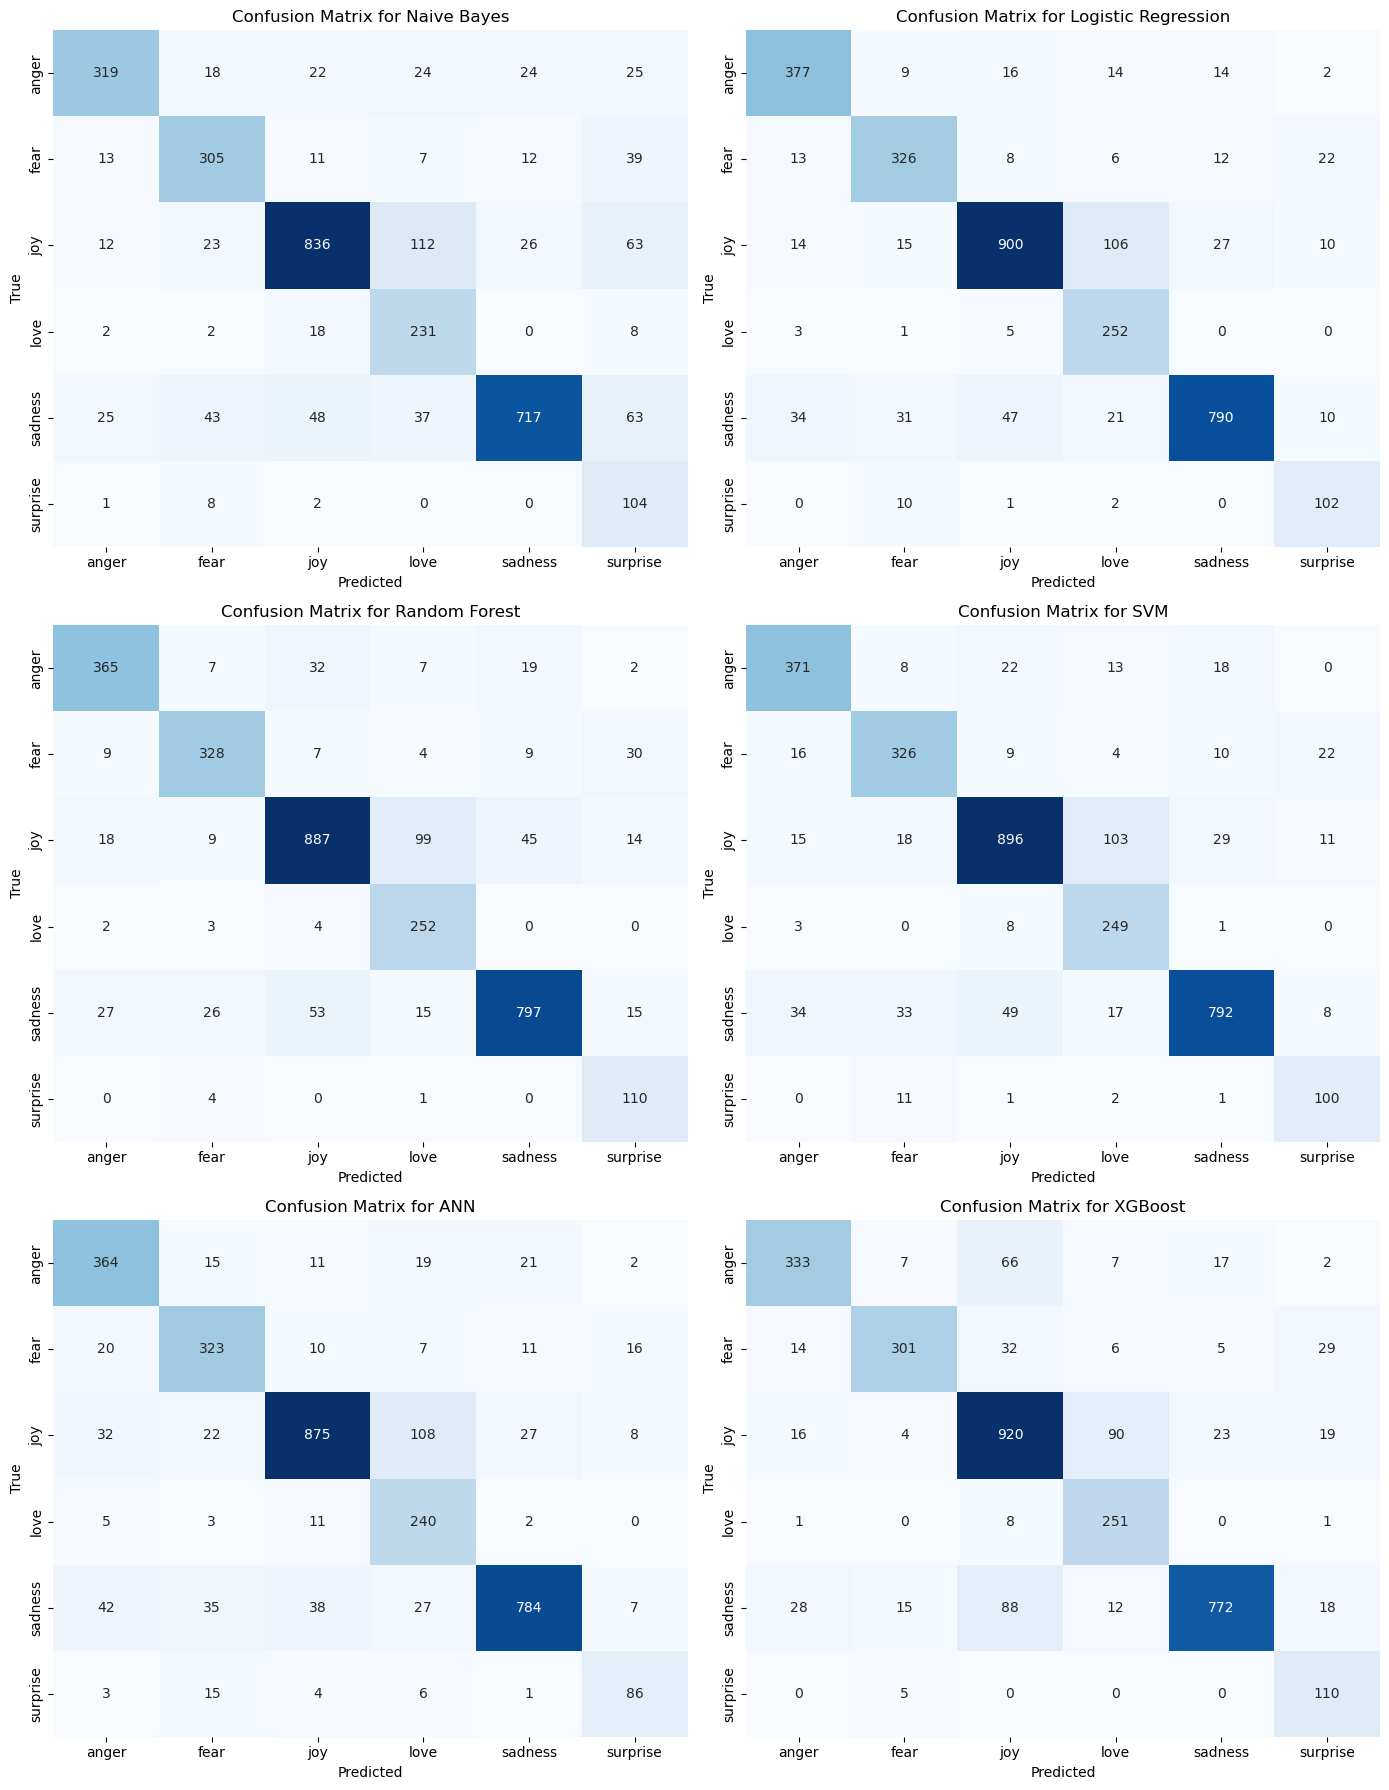

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot for confusion matrix heatmaps
fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # 3x2 grid for 5 classifiers

for i, (name, clf) in enumerate(classifiers.items()):
    # Predict using the model
    y_pred_tfidf = clf.predict(X_test_tfidf)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_tfidf)
    
    # Print confusion matrix in text format
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("\n")  # Add a newline for better readability
    
    # Plot confusion matrix as a heatmap
    ax = axes[i//2, i%2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=[emotion_labels[i] for i in range(6)], 
                yticklabels=[emotion_labels[i] for i in range(6)])
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Hide the empty subplot (if any)
if len(classifiers) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout for confusion matrix subplots
plt.tight_layout()
plt.show()


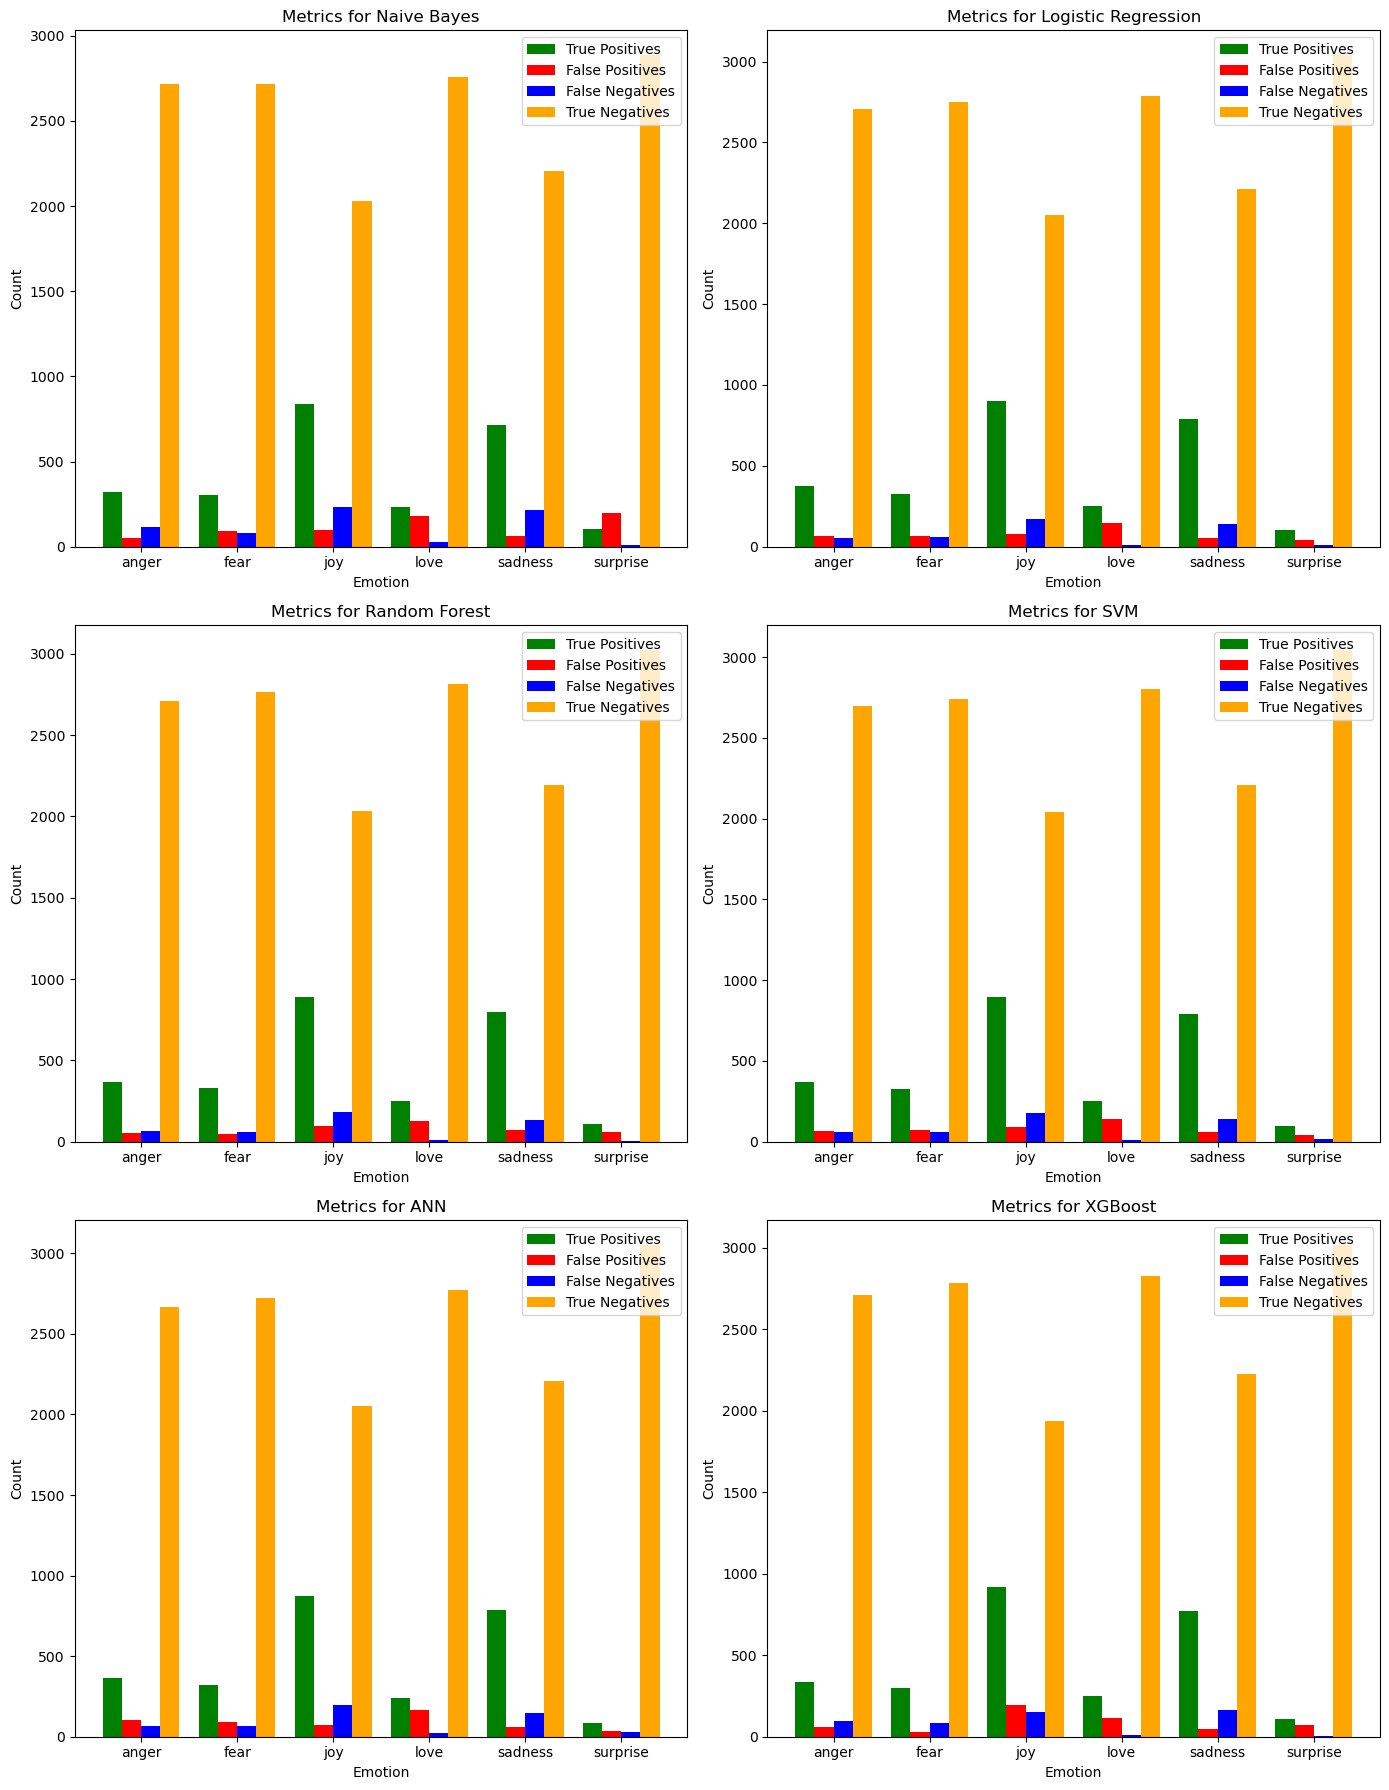

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the emotion labels
emotion_labels = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

# Initialize subplots for each model
n_models = len(classifiers)  # Number of models
n_rows = (n_models + 1) // 2  # Adjust rows dynamically based on the number of models
fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 6))  # Adjust height dynamically

# Define a function to calculate and plot TP, FP, TN, FN
def plot_confusion_metrics(cm, model_name, ax, emotion_labels):
    # Extract TP, FP, TN, FN from confusion matrix
    TP = np.diag(cm)  # True Positives are diagonal elements
    FP = np.sum(cm, axis=0) - TP  # False Positives for each class
    FN = np.sum(cm, axis=1) - TP  # False Negatives for each class
    TN = np.sum(cm) - (FP + FN + TP)  # True Negatives for each class
    
    # Set the bar width
    bar_width = 0.2
    index = np.arange(len(emotion_labels))  # X-axis indices for bars
    
    # Plot bars for each metric
    ax.bar(index, TP, bar_width, label='True Positives', color='g')
    ax.bar(index + bar_width, FP, bar_width, label='False Positives', color='r')
    ax.bar(index + 2*bar_width, FN, bar_width, label='False Negatives', color='b')
    ax.bar(index + 3*bar_width, TN, bar_width, label='True Negatives', color='orange')
    
    ax.set_title(f'Metrics for {model_name}')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Count')
    ax.set_xticks(index + 1.5*bar_width)
    ax.set_xticklabels(emotion_labels)
    ax.legend()

# Flatten axes for easier indexing if the number of rows > 1
if n_rows > 1:
    axes = axes.flatten()

# Loop over models and plot the metrics
for i, (name, clf) in enumerate(classifiers.items()):
    # Predict using the model
    y_pred_tfidf = clf.predict(X_test_tfidf)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_tfidf)
    
    # Plot the confusion matrix metrics
    plot_confusion_metrics(cm, name, axes[i], [emotion_labels[i] for i in range(6)])

# Adjust layout for confusion matrix subplots
plt.tight_layout()
plt.show()


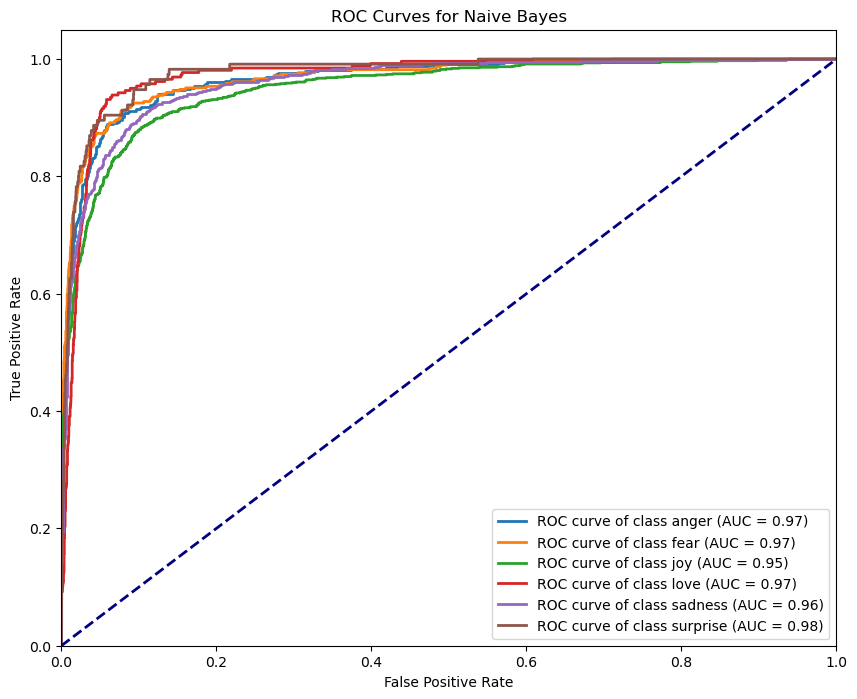

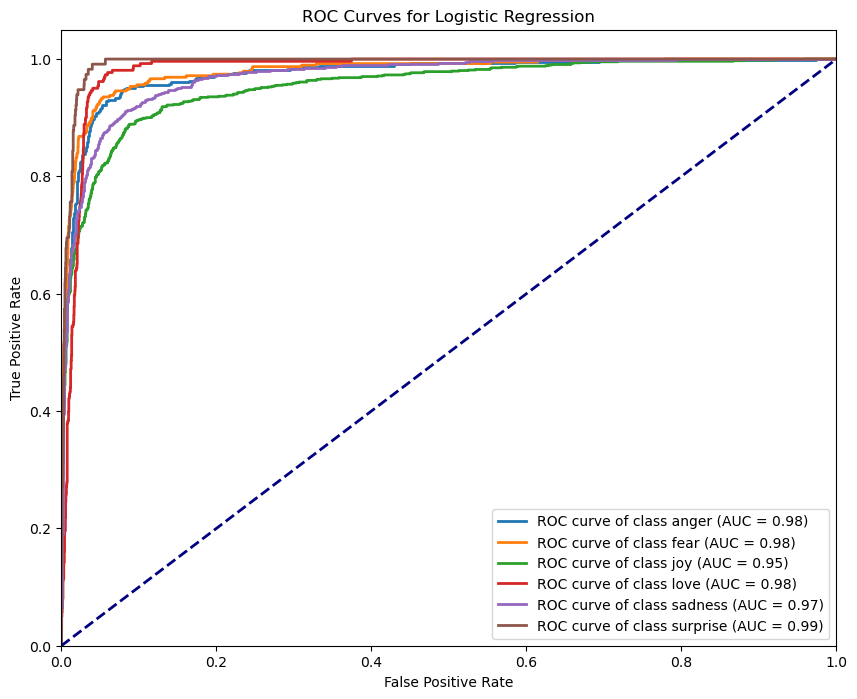

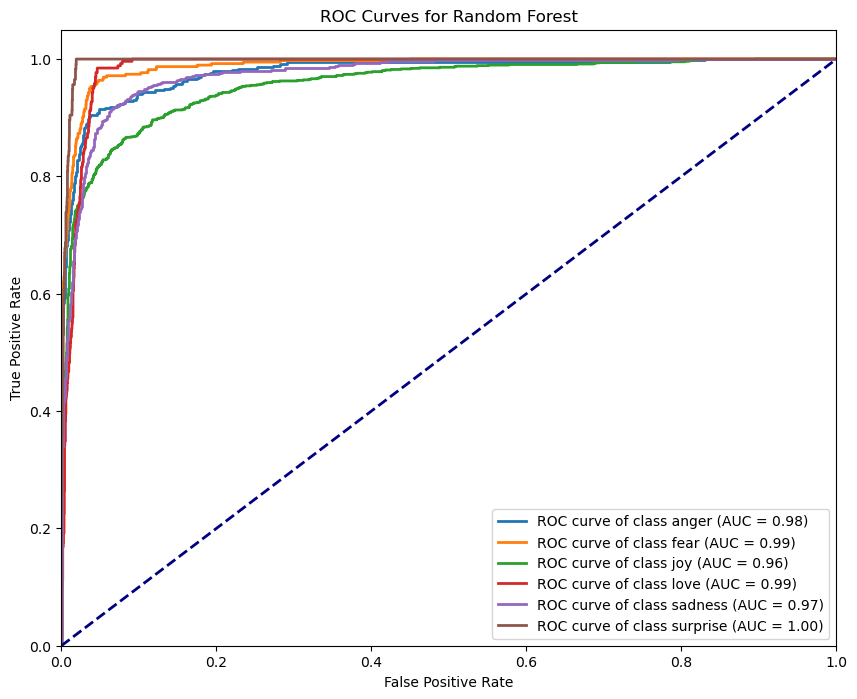

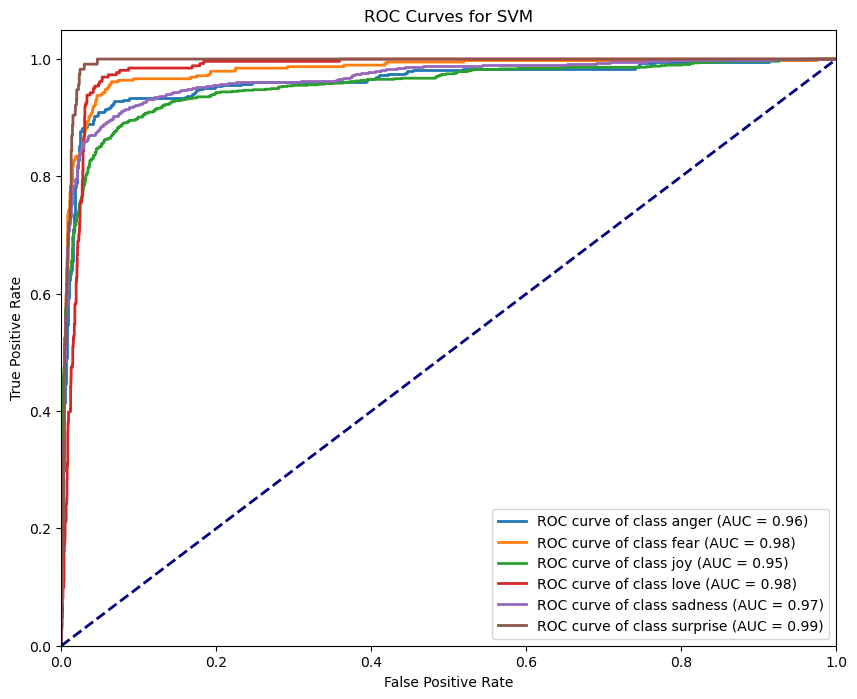

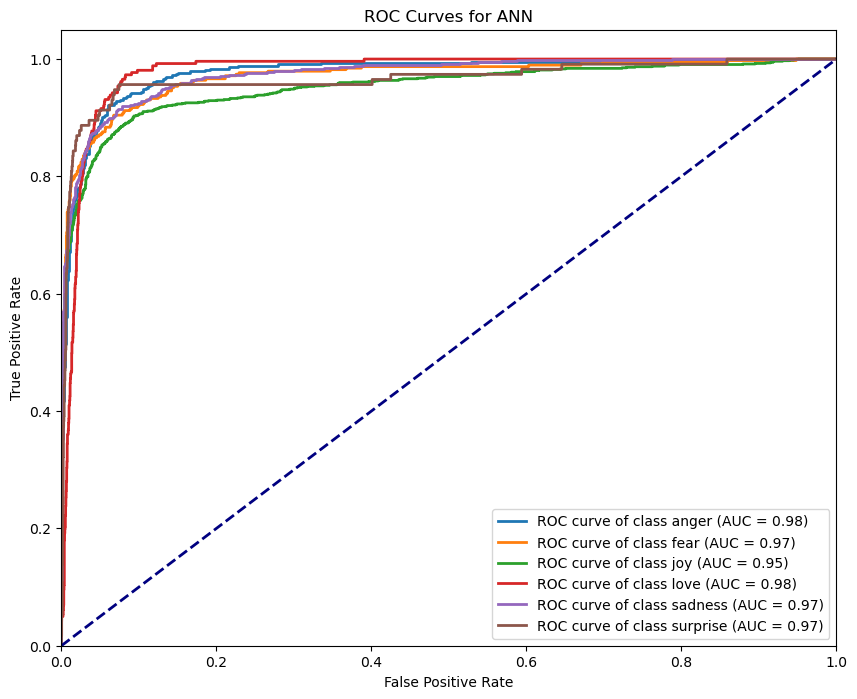

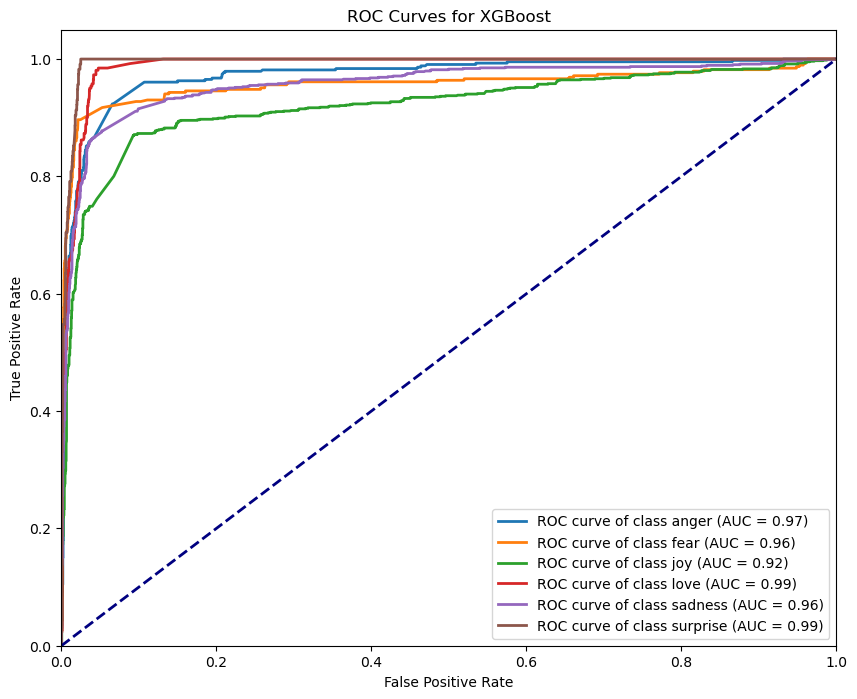

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Iterate through classifiers
for name, clf in classifiers.items():
    # Set up plot for each model
    fig, ax = plt.subplots(figsize=(10, 8))
    
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test_tfidf)
    else:
        y_score = clf.predict_proba(X_test_tfidf)
        
    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'ROC curve of class {emotion_labels[i]} (AUC = {roc_auc:.2f})')
    
    # Plot diagonal for random guessing
    ax.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curves for {name}")
    ax.legend(loc="lower right")
    
    # Show the plot for the current model
    plt.show()


### 5. Discussion

**1. Naive Bayes**
* Accuracy: 0.66 (66.19%)
* Performance:
    * Naive Bayes shows a strong performance in recognizing "joy" and "sadness" with high recall for these classes. For "joy", the recall is very high at 0.99, meaning almost all joyful instances are correctly identified.
    * However, it struggles significantly with "anger", "fear", "love", and especially "surprise", where the recall is extremely low (0.01). This suggests Naive Bayes has difficulty distinguishing between more nuanced emotions.
    * F1-scores: Moderate for "joy" (0.74) and "sadness" (0.80), but very low for others, indicating poor balance between precision and recall.
* Naive Bayes shows the most confusion, particularly between "joy" and other emotions like "anger" and "fear."

**2. Logistic Regression**
* Accuracy: 0.86 (86.19%)
* Performance:
    * Logistic Regression improves accuracy significantly compared to Naive Bayes, showing strong performance across most emotions.
The model is especially effective for "joy" (F1-score: 0.88) and "sadness" (F1-score: 0.92), with a high recall (0.96 and 0.94, respectively), indicating it can reliably identify these emotions.
    * "Anger" and "fear" are also predicted with good precision and recall, but "love" and "surprise" show slightly lower recall (0.61 and 0.47), meaning these are harder for the model to predict accurately.
* Logistic Regression reduces misclassifications significantly, but "love" and "surprise" remain challenging.

**3. Random Forest**
* Accuracy: 0.88 (88.44%)
* Performance:
    * Random Forest outperforms Logistic Regression, achieving the highest accuracy among the models.
    * It performs very well on "joy", "sadness", "fear", and "anger", with F1-scores around or above 0.87.
    * While "love" and "surprise" still show lower recall (0.73 and 0.68), the performance is better than other models for these categories.
    * This model has balanced precision and recall across most emotion categories, making it the best performer overall in this context.
* Random Forest has the best balance overall, especially for harder-to-classify emotions like "love" and "surprise."

**4. Support Vector Machine (SVM)**
* Accuracy: 0.85 (85.28%)
* Performance:
    * SVM performs similarly to Logistic Regression, with very good precision and recall for "anger", "fear", "joy", and "sadness".
    * "Surprise" and "love" have lower recall (0.51 and 0.55), which suggests that like Logistic Regression, SVM struggles with these emotions.
    * Overall, SVM achieves strong scores in major emotion categories like "joy" (F1-score: 0.87) and "sadness" (F1-score: 0.92).
* SVM performs similarly to Logistic Regression but also struggles with "love" and "surprise."

**5. Artificial Neural Network (ANN)**
* Accuracy: 0.8303 (83.03%)
* Performance:
    * The ANN achieves competitive performance, with an accuracy slightly lower than SVM and Logistic Regression. Its strengths lie in predicting common emotions like "joy" and "sadness," with F1-scores of 0.86 and 0.89, respectively.
    * However, it struggles with less common categories such as "love" and "surprise," where recall is lower (0.57 and 0.49, respectively). This could indicate that the ANN model requires more data or optimized hyperparameters to better handle rare categories.
    * Compared to other models, ANN has slightly lower precision and recall across most categories, indicating room for improvement, potentially through deeper layers or fine-tuning parameters.
* ANN demonstrates reasonable accuracy and solid performance on major emotion categories but struggles with rarer emotions. While it doesn't outperform Random Forest or SVM, it is a strong contender with potential for improvement given additional tuning.

**4. XGBoost (Extreme Gradient Boosting)**
* Accuracy: 0.8397 (83.97%)
* Performance:
    * XGBoost provides excellent performance, achieving accuracy close to ANN and SVM. It shows robust handling of "joy" (F1-score: 0.84) and "sadness" (F1-score: 0.88), with high recall for these categories.
    * For rarer emotions like "love" and "surprise," XGBoost delivers decent recall (0.69 and 0.61) compared to other models like Logistic Regression or ANN. This suggests that its ability to focus on subtle patterns through boosting aids in better classification of nuanced emotions.
    * While not the top performer in any single category, XGBoost shows consistency across all categories, making it a reliable choice for balanced performance.
* XGBoost demonstrates solid accuracy and consistency across all emotions. Its balanced performance makes it a good choice for general-purpose classification, though it slightly trails behind Random Forest in overall accuracy.

**Overall Insights**
* Best Model: Random Forest shows the highest accuracy (88.44%) and the best overall balance between precision and recall for most emotions.
* Challenges: Across all models, "love" and "surprise" are more difficult to predict accurately, with lower recall and F1-scores. This could be due to the lower frequency of these emotions in the dataset or their nuanced nature.
* Strong Contenders:
    - SVM and Logistic Regression: Both provide high accuracy and strong performance on "joy," "sadness," and "anger," with only minor struggles on "love" and "surprise."
    - XGBoost: While slightly behind Random Forest, XGBoost shows consistent performance and excels in its ability to classify emotions with balanced recall and precision.
* Naive Bayes Limitations: Naive Bayes, while effective for simple tasks, struggles with more complex emotions and shows poor performance on the less common categories like "surprise" and "love".

In [68]:
# Sample input phrase for prediction
sample_phrase = ["I'm feeling so excited and happy today!"]

# Transform the sample phrase into the same TF-IDF format used for training
sample_phrase_tfidf = tfidfvectorizer.transform(sample_phrase)

# Use the trained Random Forest model to predict the emotion
predicted_emotion_label = classifiers['Random Forest'].predict(sample_phrase_tfidf)

# Mapping the numerical label back to the emotion
emotion_mapping = {0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}
predicted_emotion = emotion_mapping[predicted_emotion_label[0]]

# Output the predicted emotion
print(f"The predicted emotion for the phrase '{sample_phrase[0]}' is: {predicted_emotion}")

The predicted emotion for the phrase 'I'm feeling so excited and happy today!' is: joy
